# Goal of the Lab

Predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

# Load the dataset and create a dataframe

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df=pd.read_csv('customer_churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.columns= df.columns.str.lower()

In [5]:
df_churn = df[['tenure', 'seniorcitizen','monthlycharges', 'churn']]

# Clean the data and define variables

In [6]:
df_churn.info() # There are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   seniorcitizen   7043 non-null   int64  
 2   monthlycharges  7043 non-null   float64
 3   churn           7043 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 220.2+ KB


In [7]:
df.duplicated(keep='first').sum() # There are no duplicates

0

In [8]:
# Define target variable
y = df_churn['churn']

In [9]:
# Define independent variables
X = df_churn.drop('churn', axis=1)

In [10]:
y.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
#transform yes and no to 1 and 0:
def convert(string):
    if string == 'Yes':
        return 1
    else:
        return 0

In [12]:
y=pd.Series(list(map(convert,y)))

In [13]:
y.unique()

array([0, 1])

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
X[['tenure','seniorcitizen','monthlycharges']] = scaler.fit_transform(X[['tenure','seniorcitizen','monthlycharges']]) #the standard goes from 0-1, which fits that case

# Build the logistic regression model

In [17]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression() 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
clf=logreg.fit(X_train,y_train) # train the model

# Evaluate the model

In [18]:
y_pred=clf.predict(X_test) # clf is our trained model, predict is a function to estimate the Y and X_test is the data we use to predict the y

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

In [20]:
accuracy_score(y_test,y_pred) # The accuracy is so high because it gives us only an overall estimation of the model, without considering the different classes we have

0.7827733080927591

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

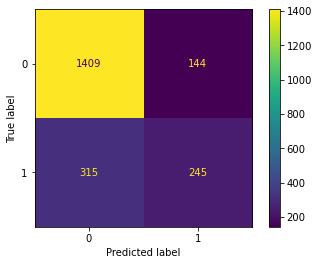

In [22]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
# we can see that the model doesn't fit very well. There are more unpredicted churns (that happened) than predicted ones.
# We also see that we have imbalanced data, we need to try another model to fix it

In [23]:
cmx=confusion_matrix(y_test,y_pred)
import seaborn as sns 

<AxesSubplot:>

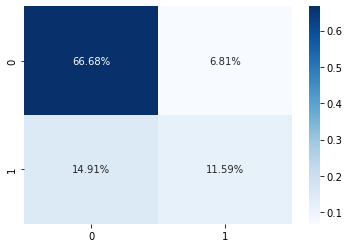

In [24]:
sns.heatmap(cmx/np.sum(cmx),annot=True, fmt='.2%',cmap='Blues')

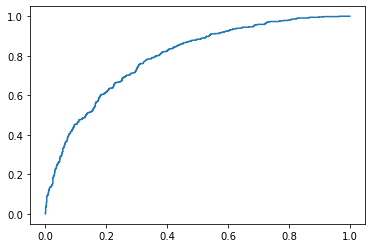

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_pred_probability=clf.predict_proba(X_test)[::,1]
fpr,tpr,_=roc_curve(y_test,y_pred_probability)
auc=roc_auc_score(y_test,y_pred_probability)
plt.plot(fpr, tpr, label='model 1, auc='+str(auc))
plt.show()

In [26]:
target_names = ['bad loans', 'good loans']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   bad loans       0.82      0.91      0.86      1553
  good loans       0.63      0.44      0.52       560

    accuracy                           0.78      2113
   macro avg       0.72      0.67      0.69      2113
weighted avg       0.77      0.78      0.77      2113



# Try another model: Synthetic Minority Oversampling Technique (SMOTE)

In [27]:
from imblearn.over_sampling import SMOTE 

In [28]:
smt= SMOTE()

In [29]:
X_tl,y_tl=smt.fit_resample(X,y) # resampling the database by applying the SMOTE model

In [30]:
y.shape

(7043,)

In [31]:
y.value_counts()

0    5174
1    1869
dtype: int64

In [32]:
y_tl.shape #applying this over sampling model we have increased the number of rows

(10348,)

In [33]:
X_tl.shape

(10348, 3)

In [34]:
y_tl.value_counts()

0    5174
1    5174
dtype: int64

In [35]:
X_train_tl, X_test_tl, y_train_tl, y_test_tl = train_test_split(X_tl, y_tl, test_size=0.3, random_state=40)

In [36]:
clf_tl=logreg.fit(X_train_tl,y_train_tl) #training the model again with the new df

In [37]:
y_pred_tl=clf_tl.predict(X_test_tl) # run the model

In [38]:
accuracy_score(y_test_tl,y_pred_tl)

0.7262479871175523

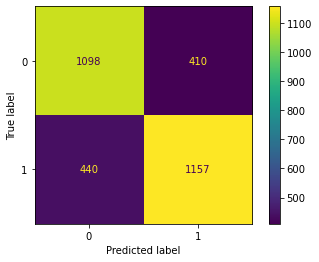

In [39]:
cm = confusion_matrix(y_test_tl, y_pred_tl, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()  # this model fits way better than the last one. We are specially interested in predicting the users that will churn and in that case we are predicting well around 2/3 of them


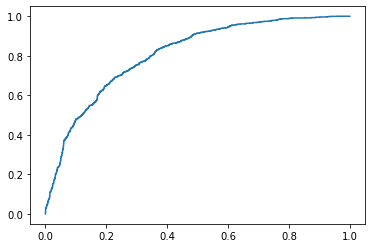

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_pred_probability=clf.predict_proba(X_test_tl)[::,1]
fpr,tpr,_=roc_curve(y_test_tl,y_pred_probability)
auc=roc_auc_score(y_test_tl,y_pred_probability)
plt.plot(fpr, tpr, label='model 1, auc='+str(auc))
plt.show()

In [41]:
target_names = ['No', 'Yes']
print(classification_report(y_test_tl, y_pred_tl, target_names=target_names))

              precision    recall  f1-score   support

          No       0.71      0.73      0.72      1508
         Yes       0.74      0.72      0.73      1597

    accuracy                           0.73      3105
   macro avg       0.73      0.73      0.73      3105
weighted avg       0.73      0.73      0.73      3105



# Try another model: Tomek Links

In [42]:
from imblearn.under_sampling import TomekLinks

In [43]:
tomek=TomekLinks()

In [44]:
X_t2,y_t2=tomek.fit_resample(X,y)

In [45]:
y.shape

(7043,)

In [46]:
y.value_counts()

0    5174
1    1869
dtype: int64

In [47]:
y_t2.shape # we are reducing the rows of the dataset by reducing the majority class

(6562,)

In [48]:
X_t2.shape

(6562, 3)

In [49]:
y_t2.value_counts()

0    4693
1    1869
dtype: int64

In [50]:
X_train_t2, X_test_t2, y_train_t2, y_test_t2 = train_test_split(X_t2, y_t2, test_size=0.3, random_state=40) # define a dataset for training and another one for testing

In [51]:
clf_t2=logreg.fit(X_train_t2,y_train_t2)

In [52]:
y_pred_t2=clf_t2.predict(X_test_t2)

In [53]:
accuracy_score(y_test_t2,y_pred_t2)

0.7887252412392077

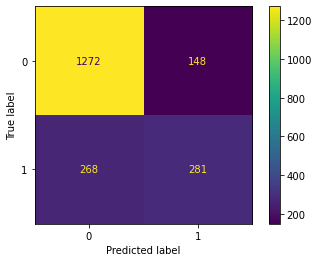

In [54]:
cm = confusion_matrix(y_test_t2, y_pred_t2, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot() #this model doesn't fit well again, the best choice would be SMOTE or a combination of both (we should check)

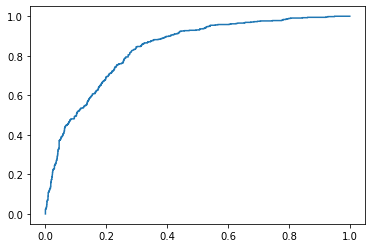

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_pred_probability=clf.predict_proba(X_test_t2)[::,1]
fpr,tpr,_=roc_curve(y_test_t2,y_pred_probability)
auc=roc_auc_score(y_test_t2,y_pred_probability)
plt.plot(fpr, tpr, label='model 1, auc='+str(auc))
plt.show()

In [56]:
target_names = ['No', 'Yes']
print(classification_report(y_test_t2, y_pred_t2, target_names=target_names))

              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1420
         Yes       0.66      0.51      0.57       549

    accuracy                           0.79      1969
   macro avg       0.74      0.70      0.72      1969
weighted avg       0.78      0.79      0.78      1969



In [58]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

ValueError: shape mismatch: value array of shape (12,) could not be broadcast to indexing result of shape (11,)